**Perkenalan**

Pengamatan cuaca harian dari berbagai lokasi di seluruh Australia, diperoleh dari Biro Meteorologi Persemakmuran Australia dan diproses untuk membuat kumpulan data sampel yang sangat besar ini untuk mengilustrasikan analitik, penambangan data, dan ilmu data menggunakan R dan Rattle. Data tersebut telah diolah untuk memberikan gambaran variabel target RainTomorrow (apakah ada hujan pada hari berikutnya - Yes/No)

Pada Final Project 2 ini, kami dari tim 2 kelas PYTN-013 yang beranggotakan Aristania, Arnonce dan Desi akan menganalisis dan memvisualisasikan data untuk memprediksi variable target apakah akan turun hujan dihari berikutnya atau tidak dengan menggunakan algoritma Logistic Regression dan SVM.

**Import Library yang digunakan**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

pd.set_option('display.max_columns', 500)

**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memuat data menggunakan gdrive
path = "/content/drive/MyDrive/weatherAUS.csv"
df = pd.read_csv(path)

In [ ]:
# Menampilkan 5 baris teratas dari data
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


**Eksplorasi data sederhana**

In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
# Ukuran dataframe
df.shape

(145460, 23)

In [ ]:
# Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Data Cleaning**

In [ ]:
# memeriksa missing values
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [ ]:
# Menghapus kolom yang tidak diperlukan
df = df.drop(['Date', 'Location'], axis=1)

In [ ]:
# Menghapus baris dengan nilai yang hilang (NaN)
df = df.dropna()

In [ ]:
# Mengubah nama kolom menjadi huruf kecil
df.rename(lambda x: x.lower().replace(' ', '_'), axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mintemp        56420 non-null  float64
 1   maxtemp        56420 non-null  float64
 2   rainfall       56420 non-null  float64
 3   evaporation    56420 non-null  float64
 4   sunshine       56420 non-null  float64
 5   windgustdir    56420 non-null  object 
 6   windgustspeed  56420 non-null  float64
 7   winddir9am     56420 non-null  object 
 8   winddir3pm     56420 non-null  object 
 9   windspeed9am   56420 non-null  float64
 10  windspeed3pm   56420 non-null  float64
 11  humidity9am    56420 non-null  float64
 12  humidity3pm    56420 non-null  float64
 13  pressure9am    56420 non-null  float64
 14  pressure3pm    56420 non-null  float64
 15  cloud9am       56420 non-null  float64
 16  cloud3pm       56420 non-null  float64
 17  temp9am        56420 non-null  float64
 18  te

In [ ]:
df.head()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustdir,windgustspeed,winddir9am,winddir3pm,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,raintomorrow
6049,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


**Eksploriasi Data**

In [ ]:
# statistik deskriptif
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mintemp,56420.0,13.464770,6.416689,-6.7,8.6,13.2,18.4,31.4
maxtemp,56420.0,24.219206,6.970676,4.1,18.7,23.9,29.7,48.1
rainfall,56420.0,2.130397,7.014822,0.0,0.0,0.0,0.6,206.2
evaporation,56420.0,5.503135,3.696282,0.0,2.8,5.0,7.4,81.2
sunshine,56420.0,7.735626,3.758153,0.0,5.0,8.6,10.7,14.5
windgustspeed,56420.0,40.877366,13.335232,9.0,31.0,39.0,48.0,124.0
windspeed9am,56420.0,15.667228,8.317005,2.0,9.0,15.0,20.0,67.0
windspeed3pm,56420.0,19.786778,8.510180,2.0,13.0,19.0,26.0,76.0
humidity9am,56420.0,65.874123,18.513289,0.0,55.0,67.0,79.0,100.0
humidity3pm,56420.0,49.601985,20.197040,0.0,35.0,50.0,63.0,100.0


In [ ]:
df.describe(include = 'object')

,windgustdir,winddir9am,winddir3pm,raintoday,raintomorrow
count,56420,56420,56420,56420,56420
unique,16,16,16,2,2
top,E,N,SE,No,No
freq,4516,4967,4153,43958,43993


**Visualisasi Data**

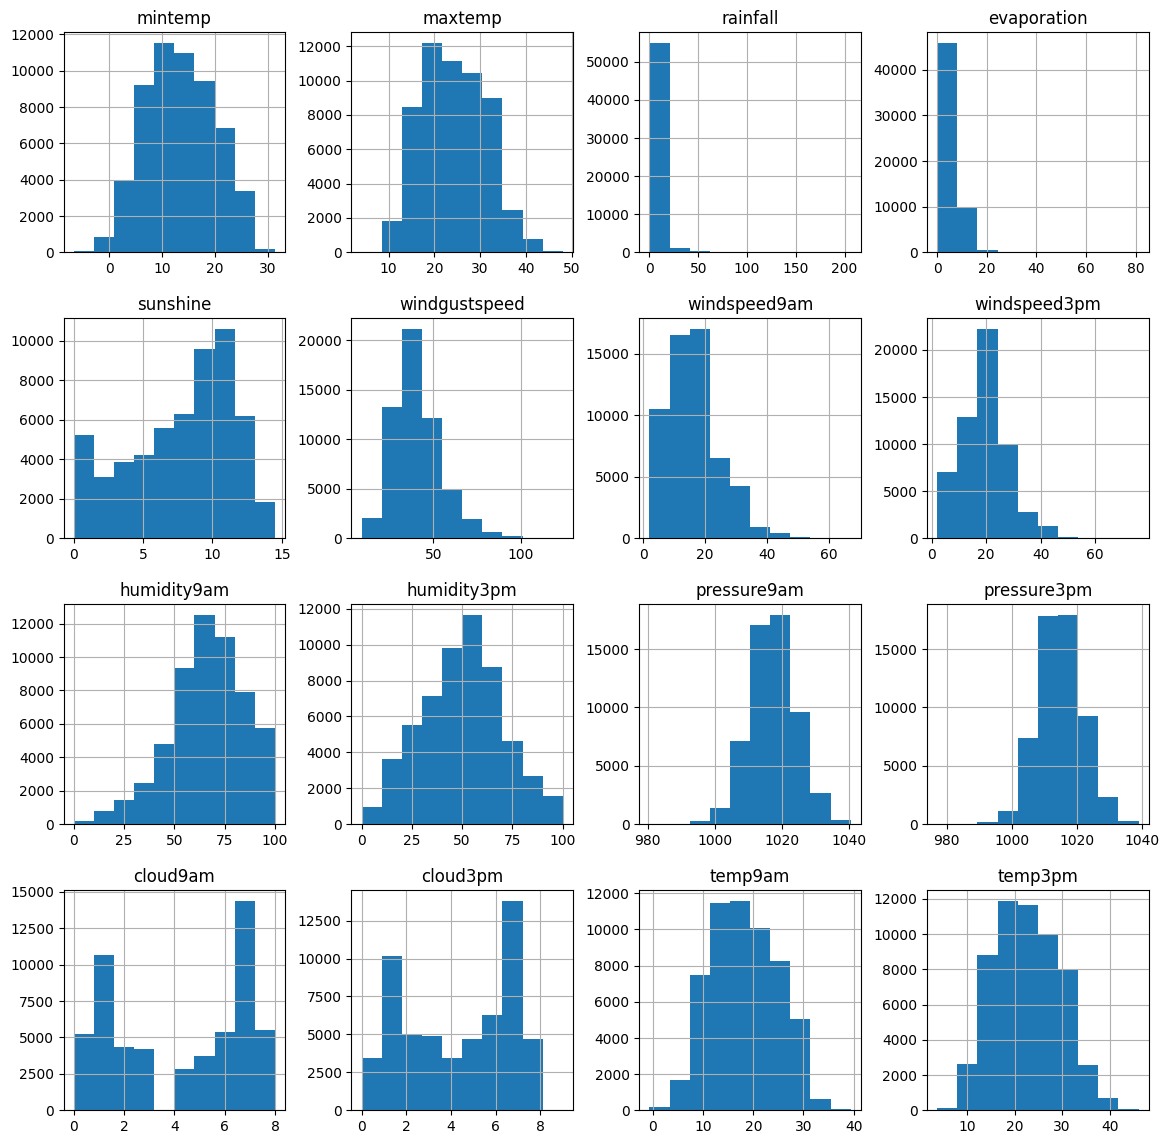

In [ ]:
df.hist(figsize=(14, 14))
plt.show()

<Figure size 800x800 with 0 Axes>

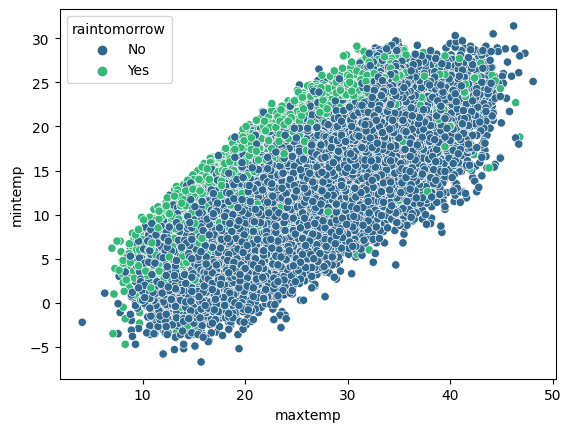

<Figure size 800x800 with 0 Axes>

In [ ]:
sns.scatterplot(x = 'maxtemp', y = 'mintemp', hue = 'raintomorrow', palette='viridis', data = df)
plt.figure(figsize=(8, 8))

Pada grafik di atas titik hijau menunjukkan bahwa besok akan hujan, sedangkan titik biru menunjukkan bahwa besok tidak akan hujan. Dapat disimpulkan bahwa terdapat hubungan linear positif antara fitur MaxTemp dan MinTemp.

<Axes: xlabel='humidity9am', ylabel='temp9am'>

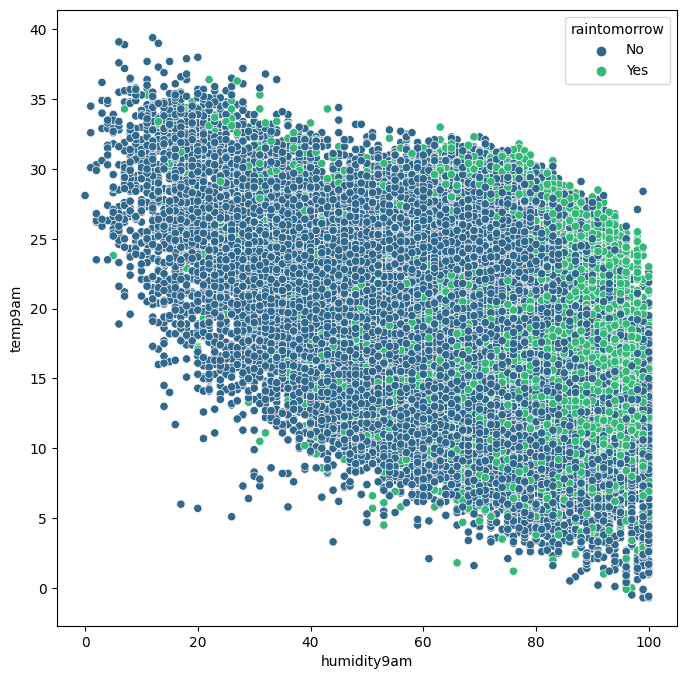

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = 'humidity9am', y = 'temp9am', hue = 'raintomorrow', palette = 'viridis', data = df)

Pada grafik di atas titik hijau menunjukkan bahwa besok akan hujan, sedangkan titik biru menunjukkan bahwa besok tidak akan hujan. Dapat dilihat bahwa titik hijau jumlahnya lebih sedikit dibandingkan dengan titik biru, terdapat hubungan positif antara kelembapan dan suhu. Semakin tinggi tingkat kelembapan, maka kemungkinan hujan juga meningkat.

**Data Preprocessing**

In [ ]:
# Mengubah variabel target menjadi numerik menggunakan LabelEncoder
le = LabelEncoder()
df['raintomorrow'] = le.fit_transform(df['raintomorrow'])

In [ ]:
# Mengubah fitur-fitur kategorikal menjadi representasi biner menggunakan One-Hot Encoding
categorical_features = ['windgustdir', 'winddir9am', 'winddir3pm']
df = pd.get_dummies(df, columns=categorical_features)

In [ ]:
# Memisahkan fitur dan target
X = df.drop(['raintomorrow', 'raintoday'], axis=1)
y = df['raintomorrow']

In [ ]:
# Melakukan penskalaan fitur menggunakan StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Pendefinisian Model**

Secara sederhana Logistic Regression adalah jenis analisis statistik yang digunakan untuk prediksi probabilitas kejadian suatu peristiwa. Jenis Logistic Regression pada dataset ini adalah Binary Logistic Regression karena hanya mengklasifikasi kedalam 2 kelas yang berbeda (hujan atau tidak hujan).

In [ ]:
# Membuat object logistic regression
logreg = LogisticRegression()

SVM atau Super Vector Model adalah salah satu model dalam supervised learning yang dapat digunakan untuk klasifikasi dan regresi. SVM membangun hyperplane dalam multidimensional space untuk memisahkan kelas yang berbeda. Inti dari SVM adalah menemukan Maximum Marginal Hyperplane (MMH) yang paling baik membagi dataset kedalam beberapa kelas.

In [ ]:
# Membuat object SVM
svm = SVC()

**Pelatihan Model**

In [ ]:
# Melatih model Logistic Regression
logreg.fit(X_train, y_train)

# Melakukan prediksi pada data uji menggunakan Logistic Regression
y_pred_logreg = logreg.predict(X_test)

In [ ]:
# Melatih model Support Vector Machine (SVM)
svm.fit(X_train, y_train)

# Melakukan prediksi pada data uji menggunakan SVM
y_pred_svm = svm.predict(X_test)

**Evaluasi Model**

In [ ]:
# Menampilkan hasil evaluasi untuk Logistic Regression
print("=== Logistic Regression ===")

print(accuracy_score(y_test, y_pred_logreg))

cm = confusion_matrix(y_test, y_pred_logreg)
print(cm)

cr = classification_report(y_test, y_pred_logreg)
print(cr)

=== Logistic Regression ===
0.8575859624246721
[[8335  464]
 [1143 1342]]
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      8799
           1       0.74      0.54      0.63      2485

    accuracy                           0.86     11284
   macro avg       0.81      0.74      0.77     11284
weighted avg       0.85      0.86      0.85     11284



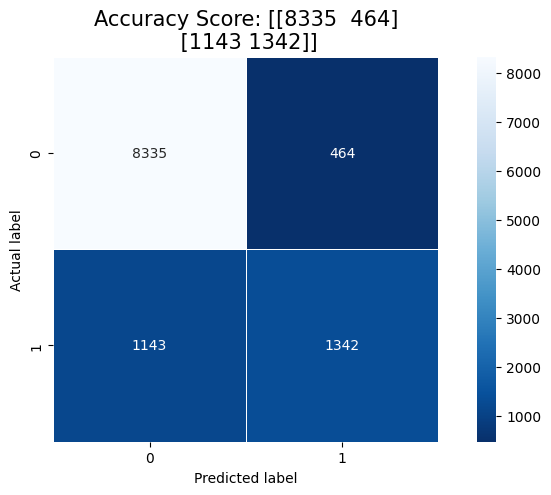

In [ ]:
# Visualisasi data dari hasil evaluasi LogisticRegression
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cm)
plt.title(all_sample_title, size = 15);

*   Nilai Confusion Matrix Logistic Regression sebesar [[8335  464]
[1143 1342]] menunjukkan bahwa:
1.   True Positif : 8335 diprediksi (positif) besok akan hujan dan memang benar (positif) hujan. 
2.   False Positif : 464 diprediksi (positif) besok akan hujan, tetapi sebenarnya (negatif) tidak hujan.
3.   False Negatif : 1143 diprediksi (negatif) besok tidak akan hujan, tetapi sebenarnya (positif) hujan.
4.   True Negatif : 1342 diprediksi (negatif) besok tidak akan hujan, dan memang benar (negatif) tidak hujan.






In [ ]:
# Menampilkan hasil evaluasi untuk SVM
print("=== Support Vector Machine (SVM) ===")

print(accuracy_score(y_test, y_pred_svm))

cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

cr_svm = classification_report(y_test, y_pred_svm)
print(cr_svm)

=== Support Vector Machine (SVM) ===
0.8574973413683091
[[8405  394]
 [1214 1271]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      8799
           1       0.76      0.51      0.61      2485

    accuracy                           0.86     11284
   macro avg       0.82      0.73      0.76     11284
weighted avg       0.85      0.86      0.85     11284



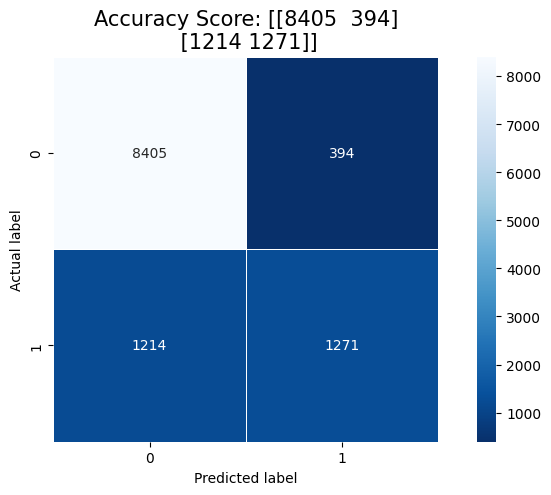

In [ ]:
# Visualisasi data dari hasil evaluasi SVM
plt.figure(figsize=(10,5))
sns.heatmap(cm_svm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(cm_svm)
plt.title(all_sample_title, size = 15);

*   Nilai Confusion Matrix Support Vector Machine sebesar [[8405  394]
[1214 1271]] menunjukkan bahwa:
1.   True Positif : 8405 diprediksi (positif) besok akan hujan dan memang benar (positif) hujan. 
2.   False Positif : 394 diprediksi (positif) besok akan hujan, tetapi sebenarnya (negatif) tidak hujan.
3.   False Negatif : 1214 diprediksi (negatif) besok tidak akan hujan, tetapi sebenarnya (positif) hujan.
4.   True Negatif : 1271 diprediksi (negatif) besok tidak akan hujan, dan memang benar (negatif) tidak hujan.

**Model Inference**

In [ ]:
df_temp = df.copy()

In [ ]:
df_to_encode = df[['raintomorrow', 'raintoday']]
df = df.drop(columns = ['raintomorrow'])

In [ ]:
df_to_encode

,raintomorrow,raintoday
6049,0,No
6050,0,No
6052,0,No
6053,0,No
6054,0,No
...,...,...
142298,0,No
142299,0,No
142300,0,No
142301,0,No


In [ ]:
df_to_encode = pd.get_dummies(df_to_encode)
df_to_encode.head()

,raintomorrow,raintoday_No,raintoday_Yes
6049,0,1,0
6050,0,1,0
6052,0,1,0
6053,0,1,0
6054,0,1,0


In [ ]:
df_clean = pd.concat([df_to_encode, df], axis = 1)

In [ ]:
df_clean

,raintomorrow,raintoday_No,raintoday_Yes,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,windgustdir_E,windgustdir_ENE,windgustdir_ESE,windgustdir_N,windgustdir_NE,windgustdir_NNE,windgustdir_NNW,windgustdir_NW,windgustdir_S,windgustdir_SE,windgustdir_SSE,windgustdir_SSW,windgustdir_SW,windgustdir_W,windgustdir_WNW,windgustdir_WSW,winddir9am_E,winddir9am_ENE,winddir9am_ESE,winddir9am_N,winddir9am_NE,winddir9am_NNE,winddir9am_NNW,winddir9am_NW,winddir9am_S,winddir9am_SE,winddir9am_SSE,winddir9am_SSW,winddir9am_SW,winddir9am_W,winddir9am_WNW,winddir9am_WSW,winddir3pm_E,winddir3pm_ENE,winddir3pm_ESE,winddir3pm_N,winddir3pm_NE,winddir3pm_NNE,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW
6049,0,1,0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
6050,0,1,0,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6052,0,1,0,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6053,0,1,0,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6054,0,1,0,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,0,1,0,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
142299,0,1,0,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
142300,0,1,0,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
142301,0,1,0,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
df_clean.raintomorrow.value_counts()

0    43993
1    12427
Name: raintomorrow, dtype: int64

terdapat 43993 data dengan nilai "0" yang berarti tidak ada hujan pada hari berikutnya (No), dan terdapat 12427 data dengan nilai "1" yang berarti ada hujan pada hari berikutnya (Yes).

Dengan demikian, distribusi kelas "0" (tidak ada hujan) lebih dominan dibandingkan dengan kelas "1" (ada hujan) dalam data frame tersebut.

In [ ]:
df_clean['raintoday'] = np.where(df_clean['raintoday'] == 'Yes', 1, 0)
df_clean['raintomorrow'] = np.where(df_clean['raintomorrow'] == 'Yes', 1, 0)

In [ ]:
X = df_clean.drop(columns = 'raintomorrow')
y = df_clean['raintomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y)

In [ ]:
X_train.head()

,raintoday_No,raintoday_Yes,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,raintoday,windgustdir_E,windgustdir_ENE,windgustdir_ESE,windgustdir_N,windgustdir_NE,windgustdir_NNE,windgustdir_NNW,windgustdir_NW,windgustdir_S,windgustdir_SE,windgustdir_SSE,windgustdir_SSW,windgustdir_SW,windgustdir_W,windgustdir_WNW,windgustdir_WSW,winddir9am_E,winddir9am_ENE,winddir9am_ESE,winddir9am_N,winddir9am_NE,winddir9am_NNE,winddir9am_NNW,winddir9am_NW,winddir9am_S,winddir9am_SE,winddir9am_SSE,winddir9am_SSW,winddir9am_SW,winddir9am_W,winddir9am_WNW,winddir9am_WSW,winddir3pm_E,winddir3pm_ENE,winddir3pm_ESE,winddir3pm_N,winddir3pm_NE,winddir3pm_NNE,winddir3pm_NNW,winddir3pm_NW,winddir3pm_S,winddir3pm_SE,winddir3pm_SSE,winddir3pm_SSW,winddir3pm_SW,winddir3pm_W,winddir3pm_WNW,winddir3pm_WSW
33614,1,0,16.9,23.9,0.0,5.6,8.0,43.0,9.0,28.0,67.0,58.0,1020.0,1014.1,6.0,4.0,19.7,23.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
10130,1,0,21.4,29.2,0.0,5.8,12.8,61.0,19.0,43.0,64.0,64.0,1010.8,1006.6,1.0,4.0,26.0,27.8,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
22748,1,0,10.4,19.5,0.0,3.6,8.7,52.0,13.0,19.0,56.0,55.0,1019.1,1015.0,2.0,3.0,17.2,18.4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
39939,1,0,20.5,28.0,0.4,6.4,3.0,37.0,17.0,13.0,88.0,92.0,1013.9,1014.2,7.0,7.0,24.0,24.7,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32564,1,0,18.5,23.5,0.0,6.8,6.6,39.0,15.0,22.0,64.0,68.0,1019.2,1015.7,7.0,7.0,20.0,22.1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


**Kesimpulan**

Berdasarkan hasil analisi data, dapat diambil beberapa kesimpulan sebagai berikut:

*   Hubungan linear positif antara MaxTemp dan MinTemp : 

    Dari grafik yang ditampilkan, terlihat adanya hubungan linear positif antara suhu maksimum (MaxTemp) dan suhu minimum (MinTemp). Hal ini mengindikasikan bahwa semakin tinggi suhu maksimum, maka suhu minimum juga cenderung tinggi.

*   Hubungan positif antara kelembapan dan suhu : 
    
    Dari grafik yang ditampilkan, terlihat bahwa semakin tinggi tingkat kelembapan, kemungkinan hujan juga cenderung meningkat. Hal ini dapat diamati dari jumlah titik hijau (indikasi akan hujan) yang lebih sedikit dibandingkan dengan jumlah titik biru (indikasi tidak hujan).

*   Evaluasi Logistic Regression :
    
    Berdasarkan Confusion Matrix yang diberikan, terdapat 8335 True Positif yang menunjukkan bahwa model Logistic Regression berhasil memprediksi dengan benar bahwa esok hari akan hujan dan memang benar terjadi hujan. Namun, terdapat 464 False Positif yang menunjukkan bahwa model salah memprediksi bahwa esok hari akan hujan padahal sebenarnya tidak hujan. Terdapat pula 1143 False Negatif yang menunjukkan bahwa model salah memprediksi bahwa esok hari tidak akan hujan padahal sebenarnya hujan. Nilai True Negatif sebesar 1342 menunjukkan bahwa model berhasil memprediksi dengan benar bahwa esok hari tidak akan hujan.

*   Evaluasi Support Vector Machine (SVM) :
    
    Berdasarkan Confusion Matrix yang diberikan, terdapat 8405 True Positif yang menunjukkan bahwa model SVM berhasil memprediksi dengan benar bahwa esok hari akan hujan dan memang benar terjadi hujan. Terdapat 394 False Positif yang menunjukkan bahwa model salah memprediksi bahwa esok hari akan hujan padahal sebenarnya tidak hujan. Terdapat pula 1214 False Negatif yang menunjukkan bahwa model salah memprediksi bahwa esok hari tidak akan hujan padahal sebenarnya hujan. Nilai True Negatif sebesar 1271 menunjukkan bahwa model berhasil memprediksi dengan benar bahwa esok hari tidak akan hujan.

*   Distribusi kelas :
    
    Terdapat 43993 data dengan nilai "0" yang berarti tidak ada hujan pada hari berikutnya (No), dan terdapat 12427 data dengan nilai "1" yang berarti ada hujan pada hari berikutnya (Yes). Distribusi kelas "0" (tidak ada hujan) lebih dominan dibandingkan dengan kelas "1" (ada hujan) dalam data frame tersebut.

Kesimpulan tersebut didasarkan pada analisis data yang dilakukan dan dapat memberikan gambaran variabel target RainTomorrow (apakah akan hujan atau tidak) dari hasil pengamatan cuaca harian dari berbagai lokasi di seluruh Australia.